<a href="https://colab.research.google.com/github/nnaemeka-git/CUNY-MSDS/blob/main/Story01_Infrastructure_Investment_funding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Infrastructure Investment & Jobs Act Funding Allocation**
###The dataset contains data on the present allocation of the Infrastructure Investment and Jobs Act funding by State and Territory.Your story (Data Visualization(s) ) should address the following questions:

* Is the allocation equitable based on the population of each of the States and Territories, or is bias apparent?

* Does the allocation favor the political interests of the Biden administration?






In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn import preprocessing
from io import StringIO
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
url = 'https://raw.githubusercontent.com/nnaemeka-git/CUNY-MSDS/main/DATA%20608/IIJA%20FUNDING%20AS%20OF%20MARCH.csv'
invt= pd.read_csv(url)
invt.head()

,"State, Teritory or Tribal Nation",State code,Total (Billions),Investment,Population,invest_per_head,Winner,Geographical Area,percent_Democratic,percent_republican
0,ALABAMA,AL,3.00000,3000000000,5108468,587.26021,Trump,135767.00000,36.56999,62.03164
1,ALASKA,AK,3.70000,3700000000,733406,5044.95464,Trump,1723337.00000,42.77195,52.83314
2,AMERICAN SAMOA,AS,0.06860,68600000,45035,1523.25969,No Electoral votes,1505.00000,0.00000,0.00000
3,ARIZONA,AZ,3.50000,3500000000,7431344,470.97806,Biden,295234.00000,49.36469,49.05598
4,ARKANSAS,AR,2.80000,2800000000,3067732,912.72640,Trump,137732.00000,34.77506,62.39573


In [5]:
invt.rename(columns={'State, Teritory or Tribal Nation':'State or territory'},inplace=True)
invt['State or territory'] = invt['State or territory'].str.upper()


In [6]:
invt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State or territory  57 non-null     object 
 1   State code          56 non-null     object 
 2   Total (Billions)    57 non-null     float64
 3   Investment          57 non-null     int64  
 4   Population          57 non-null     int64  
 5   invest_per_head     57 non-null     float64
 6   Winner              57 non-null     object 
 7   Geographical Area   56 non-null     float64
 8   percent_Democratic  57 non-null     float64
 9   percent_republican  57 non-null     float64
dtypes: float64(5), int64(2), object(3)
memory usage: 4.6+ KB


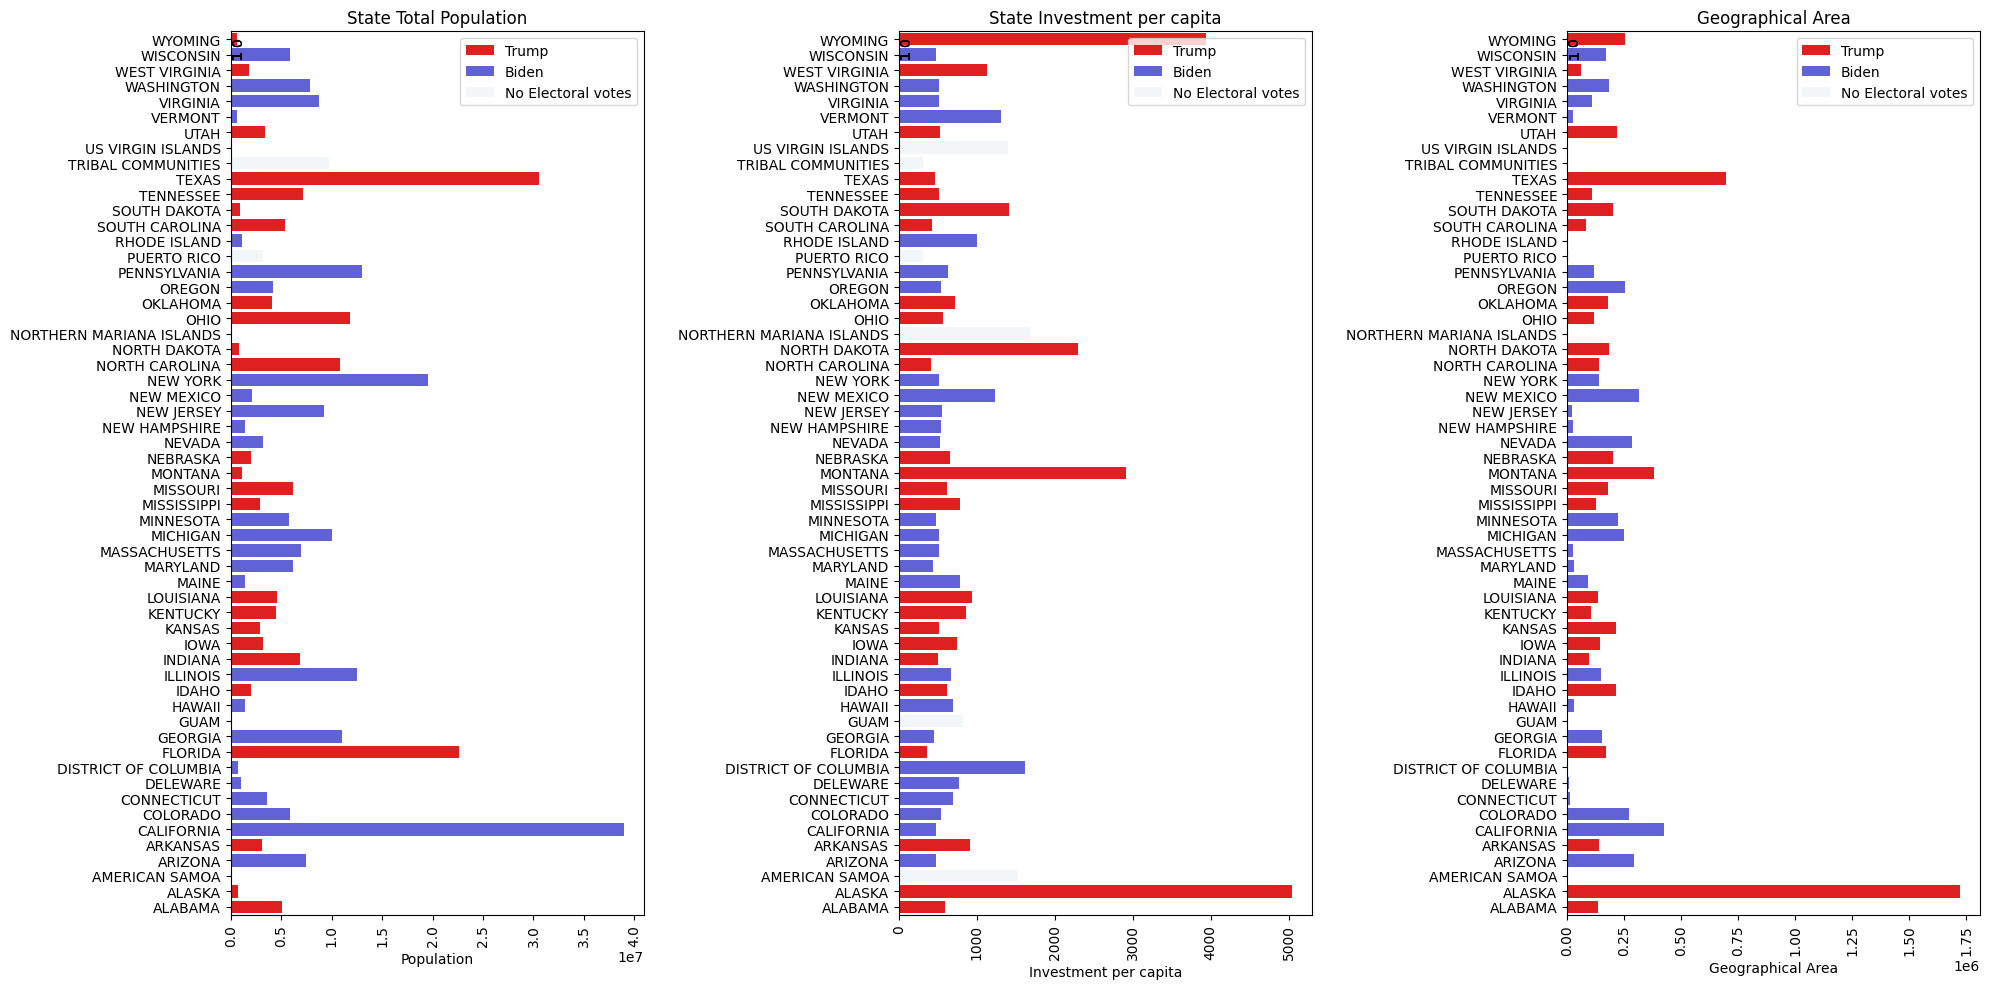

In [7]:
invt=invt.sort_values('State or territory',ascending = False)
palette ={"Trump": "#FE0000", "Biden": "#4E4FEB", "No Electoral votes": "#F1F6F9"}
fig=plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
ax=sns.barplot(x='Population',y='State or territory',hue='Winner',ci=None, palette=palette,data=invt)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('State Total Population')
plt.xlabel('Population')
plt.ylabel('')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.25),rotation=90)


plt.legend(loc=1)
#plt.legend([],[], frameon=False)
plt.grid(False)


invt=invt.sort_values('State or territory',ascending = False)
plt.subplot(1,3,2)
ax=sns.barplot(x='invest_per_head',y='State or territory',hue='Winner', palette=palette,data=invt)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('State Investment per capita')
plt.xlabel('Investment per capita')
plt.ylabel('')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.25),rotation=90)


plt.legend(loc=1)
#plt.legend([],[], frameon=False)
plt.grid(False)

invt=invt.sort_values('State or territory',ascending = False)
plt.subplot(1,3,3)
ax=sns.barplot(x='Geographical Area',y='State or territory',hue='Winner', palette=palette,data=invt)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Geographical Area')
plt.xlabel('Geographical Area')
plt.ylabel('')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.25),rotation=90)


plt.legend(loc=1)
#plt.legend([],[], frameon=False)
plt.grid(False)

plt.show()

In [8]:
invt.columns

Index(['State or territory', 'State code', 'Total (Billions)', 'Investment',
       'Population', 'invest_per_head', 'Winner', 'Geographical Area',
       'percent_Democratic', 'percent_republican'],
      dtype='object')

WIN BY DEOGRAPHICAL LOCATION

#Scatter Plot

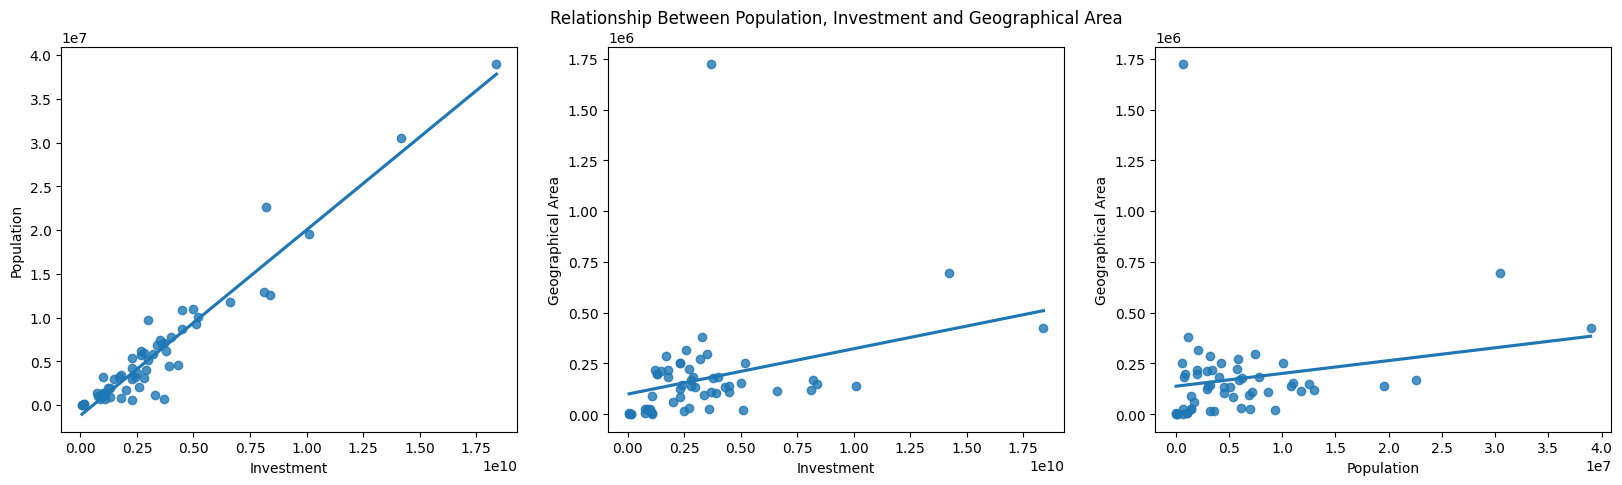

In [10]:
palette ={"Trump": "#FE0000", "Biden": "#1919ea"}
fig=plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.regplot(x='Investment', y='Population', ci = None,data=invt)
plt.subplot(1,3,2)
sns.regplot(y='Geographical Area', x='Investment', ci = None,data=invt)
plt.title('Relationship Between Population, Investment and Geographical Area')
plt.subplot(1,3,3)
sns.regplot(y='Geographical Area',x='Population',ci = None, data=invt)
plt.show()

#Correlation Plot

In [11]:
invt_cor = invt[['Investment','Population','Geographical Area']]
corrM = invt_cor.corr()
corrM

,Investment,Population,Geographical Area
Investment,1.00000,0.96079,0.30250
Population,0.96079,1.00000,0.18837
Geographical Area,0.30250,0.18837,1.00000


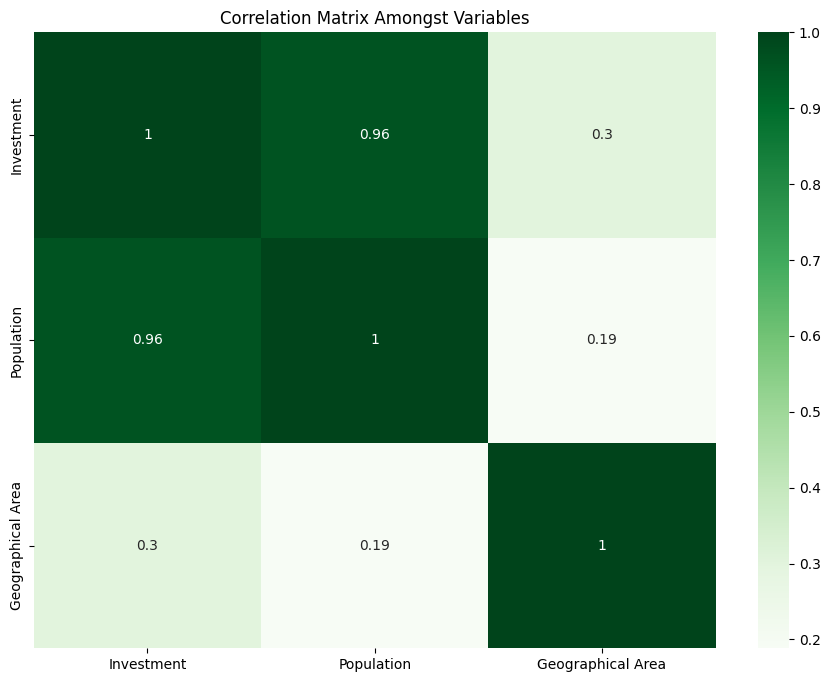

In [12]:
#invt_cor.style.background_gradient(cmap='coolwarm')
invt_cor = invt_cor.corr()
plt.figure(figsize=(11,8))
sns.heatmap(invt_cor, cmap="Greens",annot=True)
plt.title('Correlation Matrix Amongst Variables')
plt.show()

#Total Infrastructure Investment By 2020 Presidential Election Victory

In [13]:
invt = invt[invt['Winner'].isin(['Biden','Trump'])]
avg_infras = invt.groupby(['Winner']).mean()['Investment']

In [14]:
avg_infras = avg_infras.to_frame().reset_index()
avg_infras

,Winner,Investment
0,Biden,3965226923.07692
1,Trump,3540000000.00000


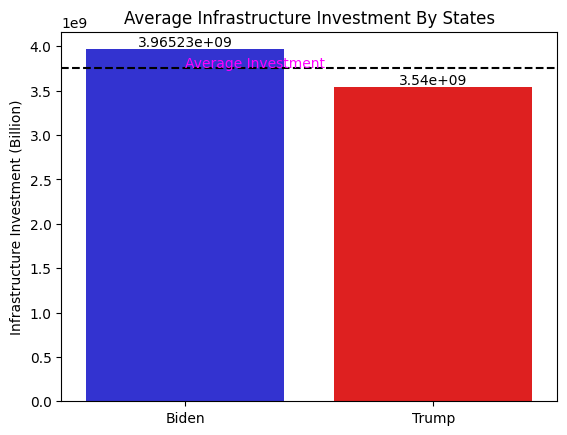

In [15]:
palette ={"Trump": "#FE0000", "Biden": "#1919ea"}
ax=sns.barplot(x='Winner',y='Investment',hue='Winner', palette=palette,data=avg_infras)
ax.axhline(y = invt['Investment'].mean(), xmin = 0, xmax = 10,color = "black", linestyle = "dashed")
ax.text(0, invt['Investment'].mean(),"Average Investment", color = "fuchsia")
#ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('')
plt.ylabel('Infrastructure Investment (Billion)')
plt.title('Average Infrastructure Investment By States')
plt.show()

#Mean Infrastructural Investment

In [16]:
invt['Investment'].mean()

3756782352.9411764

#AVERAGE INVESTMENT PER CAPITA BY 2020 Presidential Election Victory

In [17]:
avg_invest_per_capita = invt.groupby(['Winner']).mean()['invest_per_head']
avg_invest_per_capita =avg_invest_per_capita.to_frame().reset_index()
avg_invest_per_capita

,Winner,invest_per_head
0,Biden,671.79740
1,Trump,1137.92673


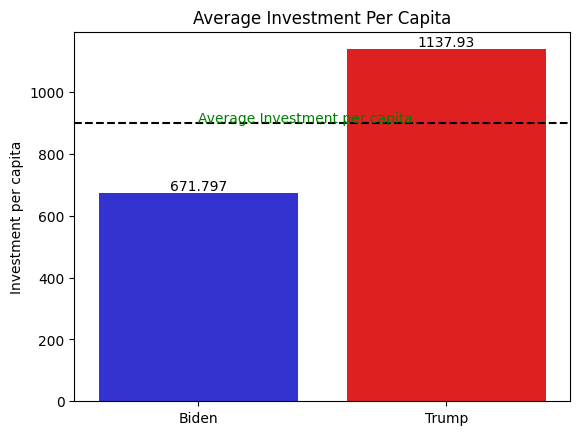

In [18]:
palette ={"Trump": "#FE0000", "Biden": "#1919ea"}
ax=sns.barplot(x='Winner',y='invest_per_head',hue='Winner', palette=palette,data=avg_invest_per_capita)
ax.axhline(y = invt['invest_per_head'].mean(), xmin = 0, xmax = 10,color = "black", linestyle = "dashed")
ax.text(0, invt['invest_per_head'].mean(),"Average Investment per capita", color = "green")
#ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('')
plt.ylabel('Investment per capita')
plt.title('Average Investment Per Capita')
plt.show()


#Mean Infrastructural Investment Per Capita

In [19]:
invt['invest_per_head'].mean()

900.2921731764706

#USA Population By 2020 Presidential Election Victory

In [20]:
avg_populn = invt.groupby(['Winner']).mean()['Population']

In [21]:
avg_populn = avg_populn.to_frame().reset_index()
avg_populn

,Winner,Population
0,Biden,7304594.11538
1,Trump,5799817.92000


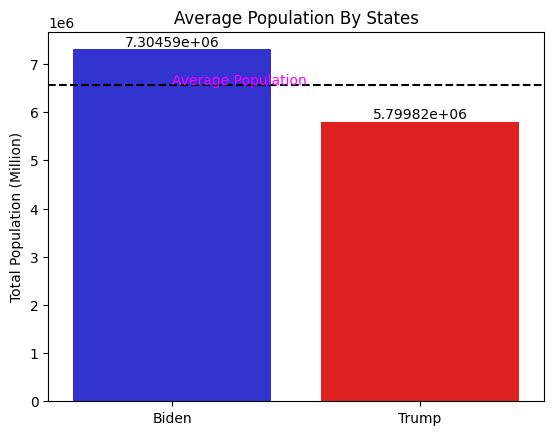

In [22]:
palette ={"Trump": "#FE0000", "Biden": "#1919ea"}
ax=sns.barplot(x='Winner',y='Population',hue='Winner', palette=palette,data=avg_populn)
ax.axhline(y = invt['Population'].mean(), xmin = 0, xmax = 10,color = "black", linestyle = "dashed")
ax.text(0, invt['Population'].mean(),"Average Population", color = "fuchsia")
#ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('')
plt.ylabel('Total Population (Million)')
plt.title('Average Population By States')
plt.show()

#Average Population In Blue and Red States


In [23]:
invt['invest_per_head'].mean()

900.2921731764706

#AVERAGE INVESTMENT BY TOTAL GEOGRAPHICAL AREA COVERED BY STATES WITH ELECTORAL COLLEGE VOTES DURING THE 2020 PRESIDENTIAL ELECTION

In [24]:
avg_landa = invt.groupby(['Winner']).mean()['Geographical Area']

In [25]:
avg_landa = avg_landa.to_frame().reset_index()
avg_landa

,Winner,Geographical Area
0,Biden,139469.92308
1,Trump,248292.04000


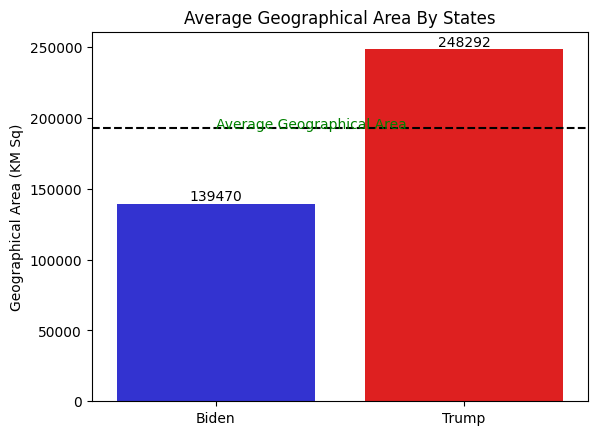

In [26]:
palette ={"Trump": "#FE0000", "Biden": "#1919ea"}
ax=sns.barplot(x='Winner',y='Geographical Area',hue='Winner', palette=palette,data=avg_landa)
ax.axhline(y = invt['Geographical Area'].mean(), xmin = 0, xmax = 10,color = "black", linestyle = "dashed")
ax.text(0, invt['Geographical Area'].mean(),"Average Geographical Area", color = "green")
#ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('')
plt.ylabel('Geographical Area (KM Sq)')
plt.title('Average Geographical Area By States')
plt.show()

#Average Geographical Area By States

In [27]:
invt['Geographical Area'].mean()

192814.0980392157

##**Conclusion:**

### In the allocation of the Infrastructure Investment and Jobs Act funding, the states that President Biden won, referred to as the Blue states, received approximately 3.97 billion. In comparison, the states that voted for Trump, known as the Red states, were allocated about 3.54 billion. Despite the disparity in the total funding received, claims of bias are not substantiated when looking at the average investment per capita. The Blue states have a lower per capita investment of around 671.8, whereas the Red states have a higher average per capita investment at approximately $1,138.

###Further analysis based on the 2020 U.S. Census reveals that the Blue states have an estimated population of roughly 7.3 million, while the Red states have a population of about 5.8 million. This difference in population is a significant factor in per capita calculations. Moreover, when considering the geographical coverage, the Red states have a much larger area, approximately 248,292 square kilometers, compared to the 139,470 square kilometers of the Blue states.
###Given these figures, it would be an oversimplification to claim bias and undue political favor of Biden political interest in the distribution of infrastructure funding based purely on the total amount received. The per capita investment and the geographical areas covered by the Red and Blue states suggest a more complex and nuanced distribution that takes into account various factors beyond just political affiliations or the number of electoral college votes.



#**Reference:**


*   USA Census data: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population
*   USA Geographical space: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_area

*  USA state longitude and latitude: https://developers.google.com/public-data/docs/canonical/states_csv








